The molecule inserted looks like this:


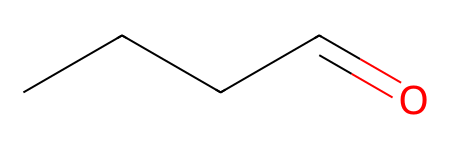

--------------------------------------
--------------------------------------
Aldehyde disconnection spotted
--------------------------------------
Option 1
Reactants


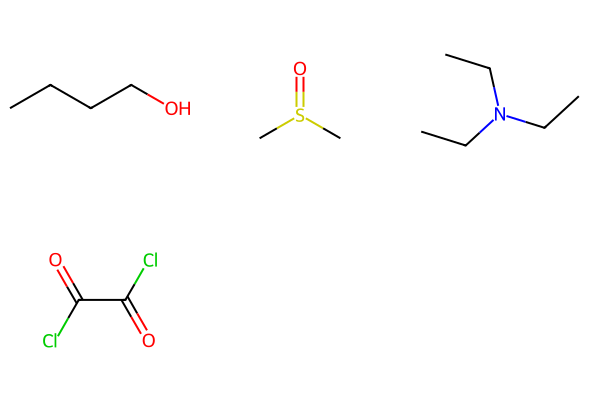

--------------------------------------
--------------------------------------


In [7]:
from bond_disconnector import disconnections

mol = 'CCCC=O'
disconnections(mol)